<a href="https://colab.research.google.com/github/Vyn18/Praktikum-KomGraf/blob/main/Praktikum%203/Prak3_Intersection_G_211_24_0032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x, y or z?: x
Rx Degrees?: 50


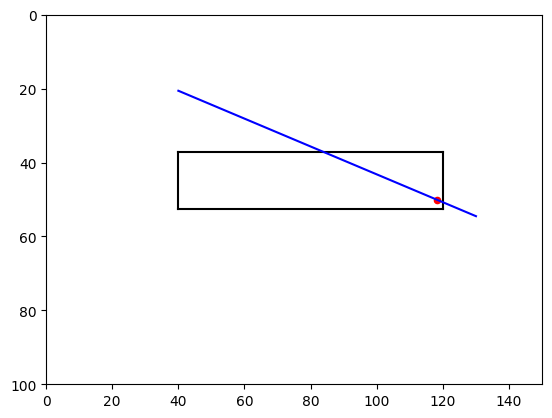

KeyboardInterrupt: Interrupted by user

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, radians, sqrt

# -fill lists with starting coordinates
xg=[]
yg=[]
zg=[]

xc=80  # center coordinates
yc=40
zc=40

x=[-40,-40,40,40,-40,50]  # system (plane and line geometry)
y=[0,0,0,0,-20,3]
z=[-10,10,10,-10,15,-10]

for i in range(len(x)):
    xg.append(x[i]+xc)
    yg.append(y[i]+yc)
    zg.append(z[i]+zc)

# --- Define rotation functions
def rotx(xc, yc, zc, xp, yp, zp, Rx):
    yp1 = (yp - yc)*cos(Rx) - (zp - zc)*sin(Rx) + yc
    zp1 = (yp - yc)*sin(Rx) + (zp - zc)*cos(Rx) + zc
    return xp + xc, yp1, zp1

def roty(xc, yc, zc, xp, yp, zp, Ry):
    xp1 = (xp - xc)*cos(Ry) + (zp - zc)*sin(Ry) + xc
    zp1 = -(xp - xc)*sin(Ry) + (zp - zc)*cos(Ry) + zc
    return xp1, yp + yc, zp1

def rotz(xc, yc, zc, xp, yp, zp, Rz):
    xp1 = (xp - xc)*cos(Rz) - (yp - yc)*sin(Rz) + xc
    yp1 = (xp - xc)*sin(Rz) + (yp - yc)*cos(Rz) + yc
    return xp1, yp1, zp + zc

# --- Plot plane, line and hit point
def plotsystem(xg,yg,zg,xh,yh,xhg,yhg,hitcolor):
    plt.plot([xg[0],xg[1]],[yg[0],yg[1]],color='k')
    plt.plot([xg[1],xg[2]],[yg[1],yg[2]],color='k')
    plt.plot([xg[2],xg[3]],[yg[2],yg[3]],color='k')
    plt.plot([xg[3],xg[0]],[yg[3],yg[0]],color='k')
    plt.plot([xg[4],xg[5]],[yg[4],yg[5]],color='b')

    if hitcolor=='g':
        plt.scatter(xg[5],yg[5],s=20,color=hitcolor)
    else:
        plt.scatter(xhg,yhg, s=20,color=hitcolor)

    plt.axis([0,150,100,0])
    plt.axis('on')
    plt.grid(False)
    plt.show()

# --- Hit point calculation
def hitpoint(x,y,z):
    a=x[5]-x[4]
    b=y[5]-y[4]
    c=z[5]-z[4]
    Q45=sqrt(a*a+b*b+c*c)

    lx=a/Q45
    ly=b/Q45
    lz=c/Q45

    a=x[3]-x[0]
    b=y[3]-y[0]
    c=z[3]-z[0]
    Q03=sqrt(a*a+b*b+c*c)

    ux=a/Q03
    uy=b/Q03
    uz=c/Q03

    a=x[1]-x[0]
    b=y[1]-y[0]
    c=z[1]-z[0]
    Q01=sqrt(a*a+b*b+c*c)

    vx=a/Q01
    vy=b/Q01
    vz=c/Q01

    nx=uy*vz-uz*vy
    ny=uz*vx-ux*vz
    nz=ux*vy-uy*vx

    vx1b=x[4]-x[0]
    vy1b=y[4]-y[0]
    vz1b=z[4]-z[0]

    Qn=(vx1b*nx+vy1b*ny+vz1b*nz)
    cosp=lx*nx+ly*ny+lz*nz

    Qh=abs(Qn/cosp)

    xh=x[4]+Qh*lx
    yh=y[4]+Qh*ly
    zh=z[4]+Qh*lz

    xhg=xh+xc
    yhg=yh+yc
    zhg=zh+zc

    a=xh-x[0]
    b=yh-y[0]
    c=zh-z[0]

    up=a*ux+b*uy+c*uz
    vp=a*vx+b*vy+c*vz

    hitcolor='r'
    if up<0 or up>Q03 or vp<0 or vp>Q01:
        hitcolor='b'

    a=x[5]-x[4]
    b=y[5]-y[4]
    c=z[5]-z[4]
    Q45=sqrt(a*a+b*b+c*c)
    if Q45 < Qh:
        hitcolor='g'

    return xh,yh,xhg,yhg,hitcolor

# --- Transform and plot functions
def plotx(xc,yc,zc, Rx):
    for i in range(len(x)):
        xg[i],yg[i],zg[i] = rotx(xc,yc,zc,x[i],y[i],z[i],Rx)
        x[i],y[i],z[i] = xg[i]-xc, yg[i]-yc, zg[i]-zc
    xh,yh,xhg,yhg,hitcolor = hitpoint(x,y,z)
    plotsystem(xg,yg,zg,xh,yh,xhg,yhg,hitcolor)

def ploty(xc,yc,zc, Ry):
    for i in range(len(x)):
        xg[i],yg[i],zg[i] = roty(xc,yc,zc,x[i],y[i],z[i],Ry)
        x[i],y[i],z[i] = xg[i]-xc, yg[i]-yc, zg[i]-zc
    xh,yh,xhg,yhg,hitcolor = hitpoint(x,y,z)
    plotsystem(xg,yg,zg,xh,yh,xhg,yhg,hitcolor)

def plotz(xc,yc, zc, Rz):
    for i in range(len(x)):
        xg[i],yg[i],zg[i] = rotz(xc,yc,zc,x[i],y[i],z[i],Rz)
        x[i],y[i],z[i] = xg[i]-xc, yg[i]-yc, zg[i]-zc
    xh,yh,xhg,yhg,hitcolor = hitpoint(x,y,z)
    plotsystem(xg,yg,zg,xh,yh,xhg,yhg,hitcolor)

# --- Input and plotting loop
while True:
    axis=input('x, y or z?: ')
    if axis == 'x':
        Rx=radians(float(input('Rx Degrees?: ')))
        plotx(xc,yc,zc,Rx)
    elif axis == 'y':
        Ry=radians(float(input('Ry Degrees?: ')))
        ploty(xc,yc,zc,Ry)
    elif axis == 'z':
        Rz=radians(float(input('Rz Degrees?: ')))
        plotz(xc,yc,zc,Rz)
    elif axis == '':
        break